In [1]:
import numpy as np
import pandas as pd
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import sklearn.metrics
from tensorflow.keras.utils import plot_model

In [2]:
label_to_class = {
    0  : 'FALLING',
    1  : 'JUMPING',          
    2  : 'RUNNING', 
    3  : 'SITTING',
    4  : 'STNDING',      
    5  : 'TRANSDW',       
    6  : 'TRANSUP',         
    7  : 'TRNSACC',      
    8  : 'WALKING',     
    9  : 'XLYINGX',     
    10 : 'WALKUPS',      
    11 : 'WALKDWS',      
}
class_to_label = {
    'FALLING'  :  0,
    'JUMPING'  :  1,          
    'RUNNING'  :  2, 
    'SITTING'  :  3,
    'STNDING'  :  4,      
    'TRANSDW'  :  5,       
    'TRANSUP'  :  6,         
    'TRNSACC'  :  7,      
    'WALKING'  :  8,     
    'XLYINGX'  :  9,     
    'WALKUPS'  :  10,      
    'WALKDWS'  :  11
}

In [3]:

activities = {
    'FALLING'  :  0,
    'JUMPING'  :  1,          
    'RUNNING'  :  2, 
    'SITTING'  :  3,
    'STNDING'  :  4,      
    'TRANSDW'  :  5,       
    'TRANSUP'  :  6,         
    'TRNSACC'  :  7,      
    'WALKING'  :  8,     
    'XLYINGX'  :  9,     
    'WALKUPS'  :  10,      
    'WALKDWS'  :  11
 }

In [ ]:
def draw_bar(ydata):
    print('Frequencies :- ',ydata.sum(axis = 0))
    
    x = np.arange(1,len(ydata[0])+1,1);
    y = ydata.sum(axis = 0)
    
    plt.figure(figsize = (12.8,3))
    plt.xlabel('Class Label',fontdict = {'size' : 15})
    plt.ylabel('Frequency',fontdict = {'size' : 15})
    bar = plt.bar(x,y)
    
    for idx,rect in enumerate(bar):
        plt.text(
            rect.get_x()+rect.get_width()/2.0,
            rect.get_height(),int(y[idx]),
            ha = 'center',
            va = 'bottom'
        )
        
    plt.show()

In [ ]:
def draw_wave(xdata,ydata,activity_label):
    
    row = 0
    while(ydata[row].argmax()+1 != activity_label) : row = row + 1;
    
    length   = xdata.shape[1]
    sensor   = xdata.shape[2]
    channel  = xdata.shape[3]
    
    x = np.linspace(0,(20)*(length-1)/1000,length)
    
    plt.figure(figsize = (12.8,2))
    plt.plot(x,xdata[row,:,0,0])
    plt.plot(x,xdata[row,:,0,1])
    plt.plot(x,xdata[row,:,0,2])
    plt.show()
    
    plt.figure(figsize = (12.8,2))
    plt.plot(x,xdata[row,:,1,0])
    plt.plot(x,xdata[row,:,1,1])
    plt.plot(x,xdata[row,:,1,2])
    plt.xlabel('Time in seconds :- ( Instance of ' + label_to_class[activity_label-1] + ' data )',fontdict = {'size' : 15})
    plt.show()
    

In [ ]:
def get_scaler(xdata):
    
    row = xdata.shape[0]
    timestamp = xdata.shape[1]
    sensor = xdata.shape[2]
    axis = xdata.shape[3]
    
    scaler = MinMaxScaler(feature_range = (-1,1))
    xdata = xdata.reshape(row,timestamp,sensor*axis)
    xdata = np.swapaxes(xdata,0,2).reshape(sensor*axis,-1).T
    scaler.fit(xdata)
    return scaler

def scale_data(xdata,scaler):
    
    row = xdata.shape[0]
    timestamp = xdata.shape[1]
    sensor = xdata.shape[2]
    axis = xdata.shape[3]
    
    xdata = xdata.reshape(row,timestamp,sensor*axis)
    xdata = np.swapaxes(xdata,0,2).reshape(sensor*axis,-1).T
    xdata = scaler.transform(xdata)
    xdata = xdata.T.reshape(sensor*axis,timestamp,row)
    xdata = np.swapaxes(xdata,0,2).reshape(row,timestamp,sensor,axis)
    
    return xdata

In [ ]:
def to_categorical(ydata):
    
    for i in range(len(ydata)):
        j = ydata[i].argmax()
        for k in range(len(ydata[i])):
            ydata[i][k] = (k == j)
    return ydata

In [ ]:
def one_hot_encoded(ydata):
    ydata = OneHotEncoder().fit_transform(ydata.reshape(len(ydata),1))
    ydata = np.asarray(ydata.todense())
    return ydata

In [4]:
xtrain=np.load('x.npy')
ytrain=np.load('y.npy')
print(xtrain.shape)
print(ytrain.shape)

ValueError: ignored

In [ ]:
activity_info = ['FALLING', 'JUMPING', 'RUNNING', 'SITTING', 'STNDING', 'TRANSDW', 'TRANSUP', 'TRNSACC', 'WALKING', 'XLYINGX','WALKUPS','WALKDWS']

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(activity_info)

train_encoded = encoder.transform(ytrain)
train_encoded

array([4, 4, 4, ..., 4, 4, 4])

In [ ]:
ytrain=train_encoded

In [ ]:
ytrain

array([4, 4, 4, ..., 4, 4, 4])

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(xtrain,ytrain,test_size = 0.3)
xtest,xval,ytest,yval = train_test_split(xtest,ytest,test_size = 0.5)

In [ ]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape,xval.shape,yval.shape

((18756, 128, 2, 3),
 (18756,),
 (4019, 128, 2, 3),
 (4019,),
 (4020, 128, 2, 3),
 (4020,))

In [ ]:
#borderline-smote
from imblearn.over_sampling import SMOTE

X = xtrain.reshape(xtrain.shape[0], -1)
sm = BorderlineSMOTE(sampling_strategy='auto')

X_resampled, y_resampled = sm.fit_resample(X, ytrain)


X_resampled = X_resampled.reshape(-1, 128, 2, 3)


print('Class distribution after oversampling:', np.bincount(y_resampled))

Class distribution after oversampling: [  64  234  916 3748 7388   71  169 7388  282 3763  373 1732]


In [ ]:
X_resampled.shape, y_resampled.shape

((81336, 128, 2, 3), (81336,))

In [ ]:
np.bincount(ytrain)

array([  68,  221,  921, 3708, 7393,   70,  172,   13,  285, 3809,  346,
       1750])

In [ ]:
xtrain=X_resampled
ytrain=y_resampled

In [ ]:
xtrain #acc데이터와 gyro데이터가 세트로 묶여있는 것으로 보임

array([[[[-3.64598000e+01,  1.18490300e+01,  1.64713900e+01],
         [-5.26922700e-03, -4.01643500e+00,  1.27651500e+00]],

        [[-3.05945000e+01,  7.75435000e+00,  5.70470000e+00],
         [-1.13052700e-01, -6.32291400e+00,  2.64510800e+00]],

        [[-3.20490600e+01, -7.07599900e+00, -1.74443600e+01],
         [ 1.40080000e+00, -4.44339600e+00,  1.98944200e+00]],

        ...,

        [[-1.44905400e+00,  9.47847300e+00, -1.21715000e+01],
         [-9.83384700e-01,  7.26623300e-01, -1.86852600e+00]],

        [[-2.08254600e+00,  8.93885800e+00, -5.00088400e+00],
         [-1.14725200e+00,  1.25475300e+00, -2.06304000e+00]],

        [[-6.22669800e+00,  1.25803100e+01,  1.40041900e+00],
         [-1.60644500e+00,  9.30980000e-01, -1.92886500e+00]]],


       [[[-1.07466200e+00, -2.37161000e+00, -3.16935800e+00],
         [ 8.25523700e-01, -2.03916700e-01,  8.42405100e-01]],

        [[-2.97038700e+00, -1.23089900e+00, -2.65850400e+00],
         [ 8.51428900e-01, -1.56425100e-

In [ ]:
scaler = get_scaler(xtrain)
xtrain = scale_data(xtrain,scaler)
xtest  = scale_data(xtest,scaler)
xval   = scale_data(xval,scaler)

In [ ]:
ytrain = one_hot_encoded(ytrain)
ytest = one_hot_encoded(ytest)
yval = one_hot_encoded(yval)

In [ ]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape,xval.shape,yval.shape

((81336, 128, 2, 3),
 (81336, 12),
 (4019, 128, 2, 3),
 (4019, 12),
 (4020, 128, 2, 3),
 (4020, 12))

In [ ]:
xtrain

array([[[[ 0.2592981 , -0.10451404,  0.04532225],
         [-0.06820285, -0.01220404, -0.04623872]],

        [[ 0.2592981 , -0.10451404,  0.04532225],
         [-0.06526119, -0.01191231, -0.04212446]],

        [[ 0.25825043, -0.10939408,  0.04199585],
         [-0.06433511, -0.01128023, -0.04081538]],

        ...,

        [[ 0.25405974, -0.12647419,  0.05696467],
         [-0.06340903,  0.00578595, -0.03791669]],

        [[ 0.2519644 , -0.1329809 ,  0.05446986],
         [-0.06133898,  0.0079253 , -0.04193745]],

        [[ 0.2519644 , -0.13460758,  0.05197506],
         [-0.06139345,  0.01016189, -0.05156857]]],


       [[[ 0.15034052, -0.04514031,  0.09854471],
         [-0.15084162, -0.00821707,  0.02342325]],

        [[ 0.14405449, -0.06222043,  0.0927235 ],
         [-0.16059267, -0.00923812, -0.00088831]],

        [[ 0.15767422, -0.08336724,  0.0927235 ],
         [-0.16015687, -0.02717948, -0.00565712]],

        ...,

        [[ 0.21005763, -0.06059375,  0.10187111],
  

For training data :- 
Frequencies :-  [7393. 7393. 7393. 7393. 7393. 7393. 7393.   13. 7393. 7393. 7393. 7393.]


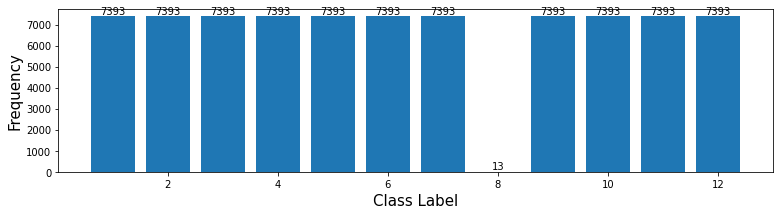

For testing data :- 
Frequencies :-  [  14.   55.  205.  848. 1565.   12.   41.    3.   58.  774.   72.  372.]


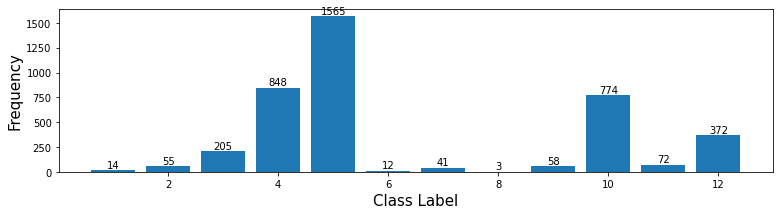

For validation data :- 
Frequencies :-  [  15.   63.  209.  790. 1592.   17.   38.    6.   65.  799.   79.  347.]


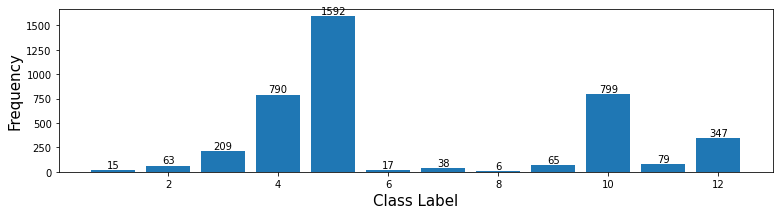

In [ ]:
print('For training data :- ')
draw_bar(ytrain)
print('For testing data :- ')
draw_bar(ytest)
print('For validation data :- ')
draw_bar(yval)

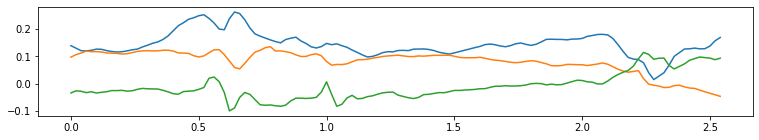

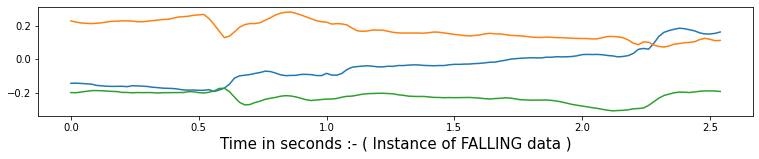

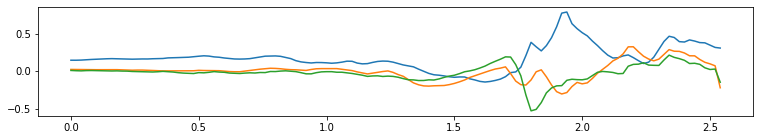

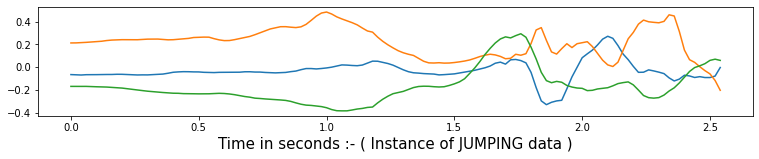

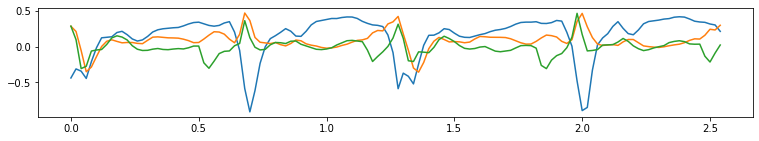

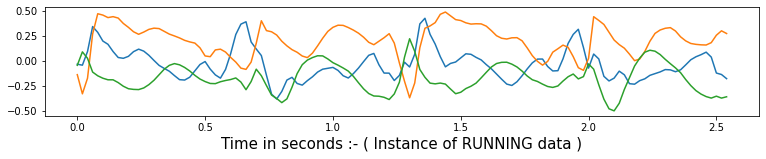

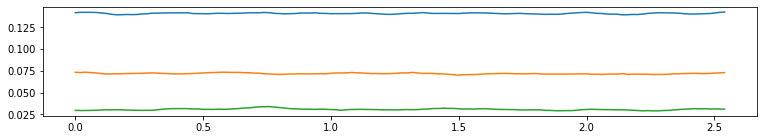

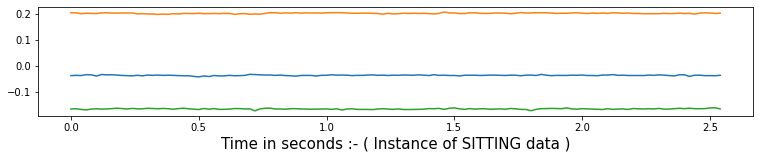

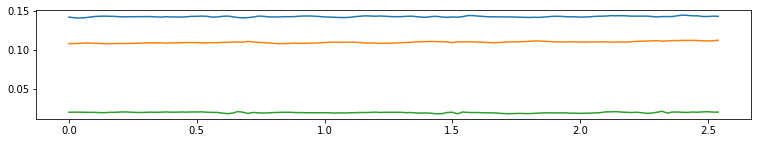

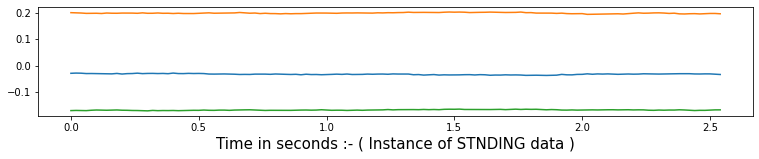

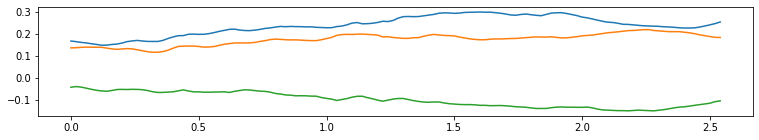

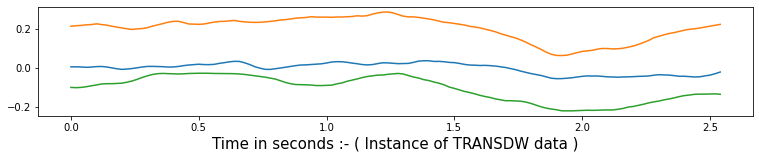

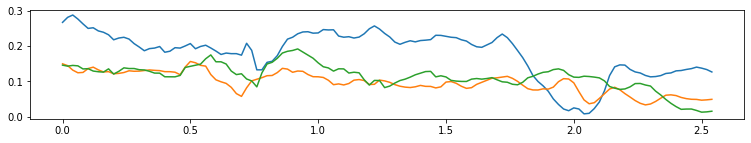

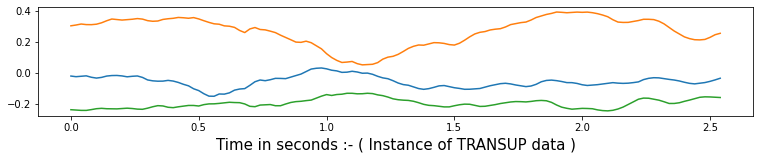

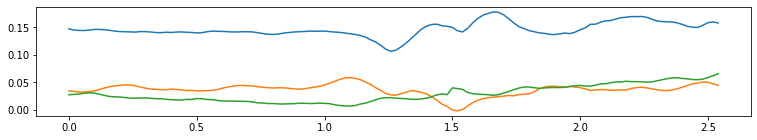

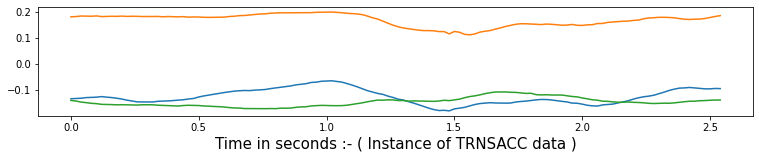

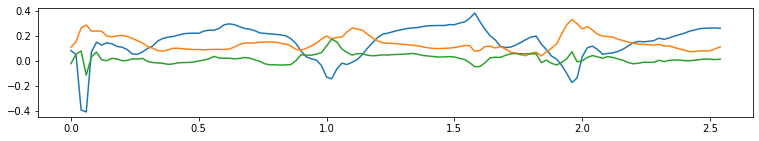

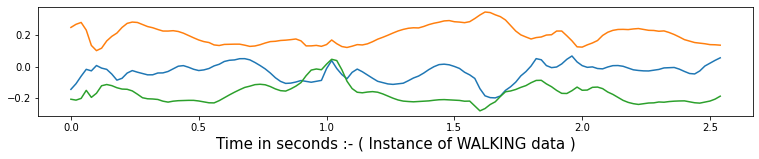

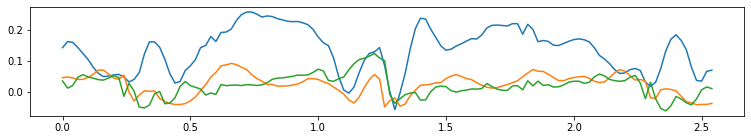

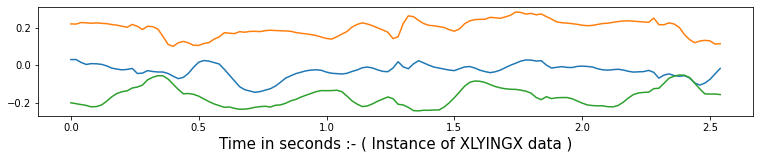

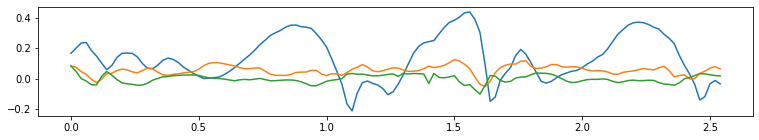

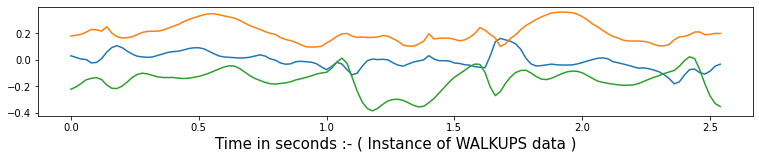

In [ ]:
for i in range(11):
    draw_wave(xtrain,ytrain,i+1)    

In [ ]:
def cnnhead_(input_shape,seq):
    input_layer = keras.Input(shape = input_shape,name = 'title_'+str(seq))
    
    cnn = layers.Conv1D(24,2,1,"same",name = 'Conv1D_'+str(seq)+'_1')(input_layer)
    cnn = layers.LayerNormalization(name = 'layernorm_'+str(seq)+'_1')(cnn)
    cnn = layers.Dropout(rate = 0.5,name = 'dropout_'+str(seq)+'_1')(cnn)

    cnn = layers.Conv1D(48,2,1,"same",name = 'Conv1D_'+str(seq)+'_2')(cnn)
    cnn = layers.LayerNormalization(name = 'layernorm_'+str(seq)+'_2')(cnn)
    cnn = layers.Dropout(rate = 0.5,name = 'dropout_'+str(seq)+'_2')(cnn)
    
    cnn = layers.Conv1D(48,2,1,"same",name = 'Conv1D_'+str(seq)+'_3')(cnn)
    cnn = layers.LayerNormalization(name = 'layernorm_'+str(seq)+'_3')(cnn)

    return input_layer,cnn

In [ ]:
def concatenate_(heads):
    final_layers = []
    for i,j in heads:
        final_layers.append(j)
    return layers.concatenate(final_layers,name = 'concatenate')

In [ ]:
def lstm_(input_, number_of_classes):
    x = layers.LSTM(4*number_of_classes,return_sequences = True,name = 'lstm_1')(input_)
    x = layers.LayerNormalization()(x)
    x = layers.LSTM(4*number_of_classes,return_sequences = True,name = 'lstm_2')(x)
    x = layers.LayerNormalization()(x)
    x = layers.LSTM(2*number_of_classes,name = 'lstm_3')(x)
    x = layers.LayerNormalization()(x)
    x = layers.Dense(2*number_of_classes,name = 'dense_1')(x)
    x = layers.Dense(number_of_classes,name = 'dense_2',activation = 'softmax')(x)
    return x

In [ ]:
def model_(heads,dense_):
    return keras.Model([i for i,j in heads],dense_,name = 'model')

In [ ]:
def build_model( xtrain, ytrain ):
    heads = []
    
    shape = xtrain.shape
    
    for i in range(len(xtrain[0][0])):
        heads.append(cnnhead_((shape[1],shape[3]),i+1))
        
    x = concatenate_(heads)
    
    x = lstm_(x,ytrain.shape[1])

    model = model_(heads,x)
    
    return model

In [ ]:
model = build_model(xtrain,ytrain)

In [ ]:
EPOCHS = 200
BATCH_SIZE = 100

In [ ]:
import time

class progress_print(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs = None):
        self.start = time.time()
        
    def on_epoch_end(self, epoch, logs=None):
        
        if epoch < 8 or (epoch+1)%10 == 0:
            print(
                'Epoch {}/{} - Time taken : {}s\nloss: {} - accuracy: {} - val_loss: {} - val_accuracy: {}\n'
                .format(epoch+1,EPOCHS,time.time()-self.start,logs['loss'],logs['accuracy'],logs['val_loss'],logs['val_accuracy'])
            )

In [ ]:
xtrain[:,:,0,:]

array([[[ 0.14069771, -0.07875677,  0.0265646 ],
        [ 0.14085489, -0.07824525,  0.02679164],
        [ 0.14206479, -0.0772619 ,  0.02712512],
        ...,
        [ 0.14173772, -0.07462202,  0.0319592 ],
        [ 0.14268563, -0.07446498,  0.03192909],
        [ 0.14215936, -0.07446194,  0.03171133]],

       [[ 0.14168715, -0.03657833,  0.05828639],
        [ 0.12598041, -0.05928968,  0.0465068 ],
        [ 0.08697593, -0.06134291,  0.03664214],
        ...,
        [ 0.09933296, -0.0229009 ,  0.03045688],
        [ 0.08742901, -0.01443273,  0.02782984],
        [ 0.08722793, -0.00985108,  0.02069742]],

       [[-0.0705713 , -0.07605822, -0.01154717],
        [ 0.02329212, -0.09120434,  0.00675805],
        [ 0.0717845 , -0.11184141,  0.02748773],
        ...,
        [ 0.33720871,  0.014523  ,  0.02109494],
        [ 0.29711893, -0.03217535, -0.01046746],
        [ 0.21770864, -0.05680596,  0.00747009]],

       ...,

       [[ 0.15408686, -0.10713724, -0.05393866],
        [ 0

In [ ]:
xtrain[:,:,1,:]

array([[[ 0.14487951,  0.19602686, -0.25930561],
        [ 0.14449713,  0.19543715, -0.25969564],
        [ 0.14468024,  0.19424441, -0.25894401],
        ...,
        [ 0.14757169,  0.19737697, -0.25993895],
        [ 0.1473697 ,  0.19721501, -0.25879892],
        [ 0.14737426,  0.19707346, -0.25937164]],

       [[ 0.12705856,  0.17618061, -0.24491817],
        [ 0.15950062,  0.16530128, -0.25239748],
        [ 0.19126747,  0.14771152, -0.25187864],
        ...,
        [ 0.14960594,  0.19375752, -0.2520271 ],
        [ 0.14901058,  0.20938301, -0.27121686],
        [ 0.1388957 ,  0.20670871, -0.280281  ]],

       [[-0.00567424,  0.276856  , -0.45040328],
        [-0.13749052,  0.1651664 , -0.43645237],
        [-0.14038562,  0.13733175, -0.45704675],
        ...,
        [ 0.1242179 , -0.00669972, -0.29592265],
        [ 0.30431385,  0.01128456, -0.2548219 ],
        [ 0.33595387, -0.00092781, -0.27818349]],

       ...,

       [[ 0.17165522,  0.19889918, -0.25224232],
        [ 0

In [ ]:
lr_scheduler = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = 0.001,
    decay_steps = int((xtrain.shape[0]+BATCH_SIZE)/BATCH_SIZE),
    decay_rate = 0.99
)


model.compile(loss = 'categorical_crossentropy',optimizer=keras.optimizers.Adam(learning_rate = lr_scheduler),metrics=['accuracy'])

history1 = model.fit(
    {'title_1':xtrain[:,:,0,:],'title_2':xtrain[:,:,1,:],
    },
    {'dense_2':ytrain},
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    validation_data = (
        {'title_1':xval[:,:,0,:],'title_2':xval[:,:,1,:]},
        {'dense_2':yval}
    ),
    verbose = 0,
    callbacks = [progress_print()]
    #initial_epoch = 0
)

Epoch 1/200 - Time taken : 47.89578700065613s
loss: 0.8304619789123535 - accuracy: 0.6978951692581177 - val_loss: 0.6048997044563293 - val_accuracy: 0.800000011920929

Epoch 2/200 - Time taken : 19.81405735015869s
loss: 0.24380385875701904 - accuracy: 0.9011507630348206 - val_loss: 0.4199880361557007 - val_accuracy: 0.8407959938049316

Epoch 3/200 - Time taken : 21.656558752059937s
loss: 0.18831856548786163 - accuracy: 0.9218795895576477 - val_loss: 0.4838293194770813 - val_accuracy: 0.7900497317314148

Epoch 4/200 - Time taken : 20.39131236076355s
loss: 0.16394728422164917 - accuracy: 0.9303998351097107 - val_loss: 0.46281692385673523 - val_accuracy: 0.8266169428825378

Epoch 5/200 - Time taken : 21.21384310722351s
loss: 0.1554080843925476 - accuracy: 0.9349488615989685 - val_loss: 0.514025866985321 - val_accuracy: 0.7888059616088867

Epoch 6/200 - Time taken : 19.90925669670105s
loss: 0.13404002785682678 - accuracy: 0.9440838098526001 - val_loss: 0.3568039536476135 - val_accuracy: 0.

In [ ]:
model.compile(loss = 'categorical_crossentropy',optimizer=keras.optimizers.Adagrad(),metrics=['accuracy'])

EPOCHS += 100

history2 = model.fit(
    {'title_1':xtrain[:,:,0,:],'title_2':xtrain[:,:,1,:],
    },
    {'dense_2':ytrain},
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    validation_data = (
        {'title_1':xval[:,:,0,:],'title_2':xval[:,:,1,:]},
        {'dense_2':yval}
    ),
    verbose = 0,
    callbacks = [progress_print()],
    initial_epoch = EPOCHS-100
)

Epoch 210/300 - Time taken : 19.905372381210327s
loss: 0.002426811493933201 - accuracy: 0.9992623329162598 - val_loss: 0.365278959274292 - val_accuracy: 0.9577114582061768

Epoch 220/300 - Time taken : 20.272340059280396s
loss: 0.0016693967627361417 - accuracy: 0.9995819926261902 - val_loss: 0.3674558401107788 - val_accuracy: 0.9577114582061768

Epoch 230/300 - Time taken : 19.64220881462097s
loss: 0.0019023315981030464 - accuracy: 0.9993975758552551 - val_loss: 0.3647220730781555 - val_accuracy: 0.9587064385414124

Epoch 240/300 - Time taken : 19.840498685836792s
loss: 0.0018088739598169923 - accuracy: 0.9994713068008423 - val_loss: 0.3667266368865967 - val_accuracy: 0.9587064385414124

Epoch 250/300 - Time taken : 19.534318923950195s
loss: 0.001886098412796855 - accuracy: 0.9993606805801392 - val_loss: 0.36919230222702026 - val_accuracy: 0.9574626684188843

Epoch 260/300 - Time taken : 20.682260990142822s
loss: 0.0018548963125795126 - accuracy: 0.9994344711303711 - val_loss: 0.368773

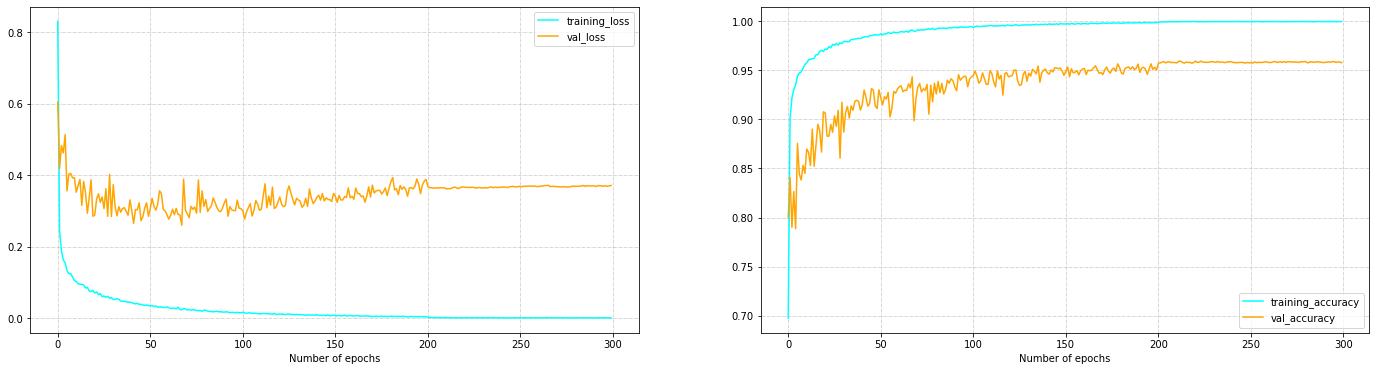

In [ ]:
plt.figure(figsize = (24,6))

# Visualizing training_loss and val_loss

plt.subplot(1,2,1)
plt.xlabel('Number of epochs')
plt.grid(True,linewidth = '0.5',linestyle = '-.')
plt.plot(history1.history['loss']+history2.history['loss'],color = 'cyan')
plt.plot(history1.history['val_loss']+history2.history['val_loss'],color = 'orange')
plt.legend(['training_loss','val_loss'])

# Visualizing training_accuracy and val_accuracy

plt.subplot(1,2,2)
plt.xlabel('Number of epochs')
plt.grid(True,linewidth = '0.5',linestyle = '-.')
plt.plot(history1.history['accuracy']+history2.history['accuracy'],color = 'cyan')
plt.plot(history1.history['val_accuracy']+history2.history['val_accuracy'],color = 'orange')
plt.legend(['training_accuracy','val_accuracy'])

plt.show()

In [ ]:
model.save_weights('trained_weights.h5')
model.load_weights('trained_weights.h5')

In [ ]:
ytrain_pred = model.predict(
    {'title_1':xtrain[:,:,0,:],'title_2':xtrain[:,:,1,:],
    }
)
ytest_pred = model.predict(
    {'title_1':xtest[:,:,0,:],'title_2':xtest[:,:,1,:],
    }
)



126/126 [==============================] - 2s 14ms/step


In [ ]:
ytrain_pred = to_categorical(ytrain_pred)
ytest_pred = to_categorical(ytest_pred)

In [ ]:
train_cm = confusion_matrix(ytrain.argmax(axis = 1),ytrain_pred.argmax(axis = 1))
test_cm = confusion_matrix(ytest.argmax(axis = 1),ytest_pred.argmax(axis = 1))

<AxesSubplot:>

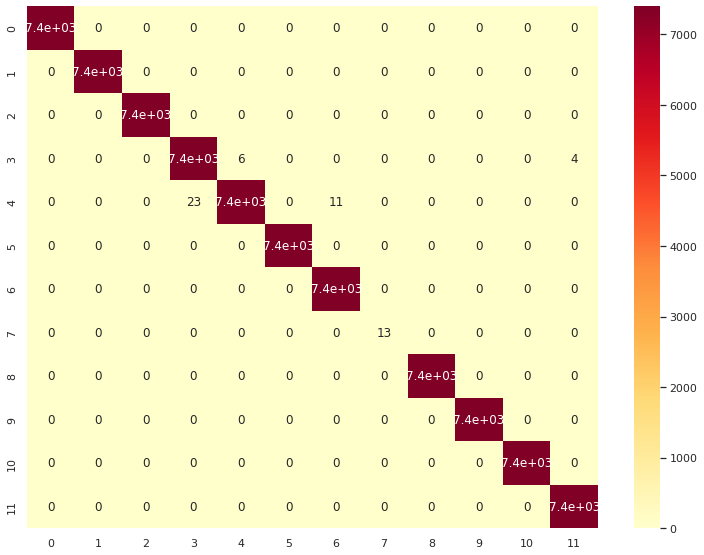

In [ ]:
sb.set(rc = {'figure.figsize':(12.8,9.6)})
sb.heatmap(train_cm,annot = True,cmap = 'YlOrRd')

<AxesSubplot:>

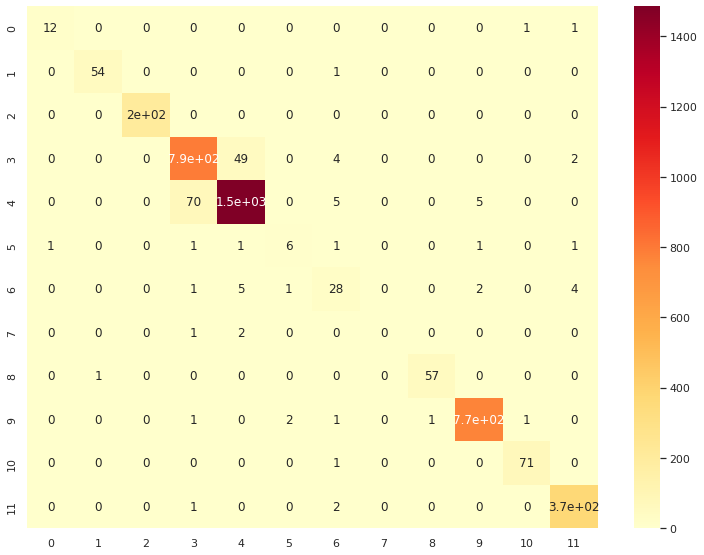

In [ ]:
sb.set(rc = {'figure.figsize':(12.8,9.6)})
sb.heatmap(test_cm,annot = True, cmap = 'YlOrRd')

In [ ]:
print(sklearn.metrics.classification_report(ytest.argmax(axis = 1),ytest_pred.argmax(axis = 1)))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.98      0.98      0.98        55
           2       1.00      1.00      1.00       205
           3       0.91      0.94      0.92       848
           4       0.96      0.95      0.96      1565
           5       0.67      0.50      0.57        12
           6       0.65      0.68      0.67        41
           7       0.00      0.00      0.00         3
           8       0.98      0.98      0.98        58
           9       0.99      0.99      0.99       774
          10       0.97      0.99      0.98        72
          11       0.98      0.99      0.99       372

    accuracy                           0.96      4019
   macro avg       0.84      0.82      0.83      4019
weighted avg       0.96      0.96      0.96      4019



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
